In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import geopandas as gpd
import statsmodels.api as sm

In [ ]:
# Load Dataset
df = pd.read_csv("/content/GlobalWeatherRepository.csv")

In [ ]:
columns_to_check = ["temperature_celsius", "humidity", "wind_kph", "pressure_mb", "air_quality_PM2.5", "air_quality_PM10"]

In [ ]:
# Compute Z-scores and detect outliers
z_scores = np.abs(df[columns_to_check].apply(zscore))
outliers = df[(z_scores > 3).any(axis=1)]

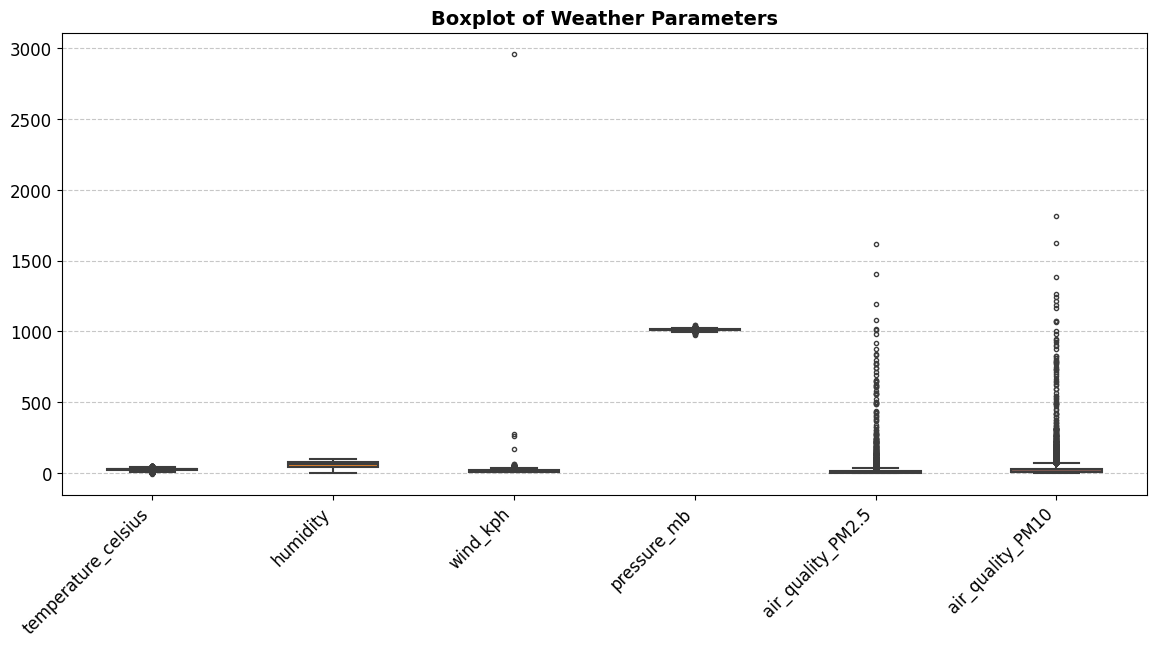

In [ ]:
# Plot Boxplots for anomaly visualization
plt.figure(figsize=(14, 6))
sns.boxplot(data=df[columns_to_check], width=0.5, linewidth=1.5, fliersize=3)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Boxplot of Weather Parameters", fontsize=14, fontweight='bold')
plt.show()


In [ ]:
# ==================== 2. Forecasting with Multiple Models ====================
forecast_columns = ["temperature_celsius", "humidity", "pressure_mb", "wind_kph"]
df_forecast = df[forecast_columns].dropna()
X = df_forecast.drop(columns=["temperature_celsius"])
y = df_forecast["temperature_celsius"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train a Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"MAE: {mae}, MSE: {mse}")

MAE: 3.6144429149982256, MSE: 24.964836115708746


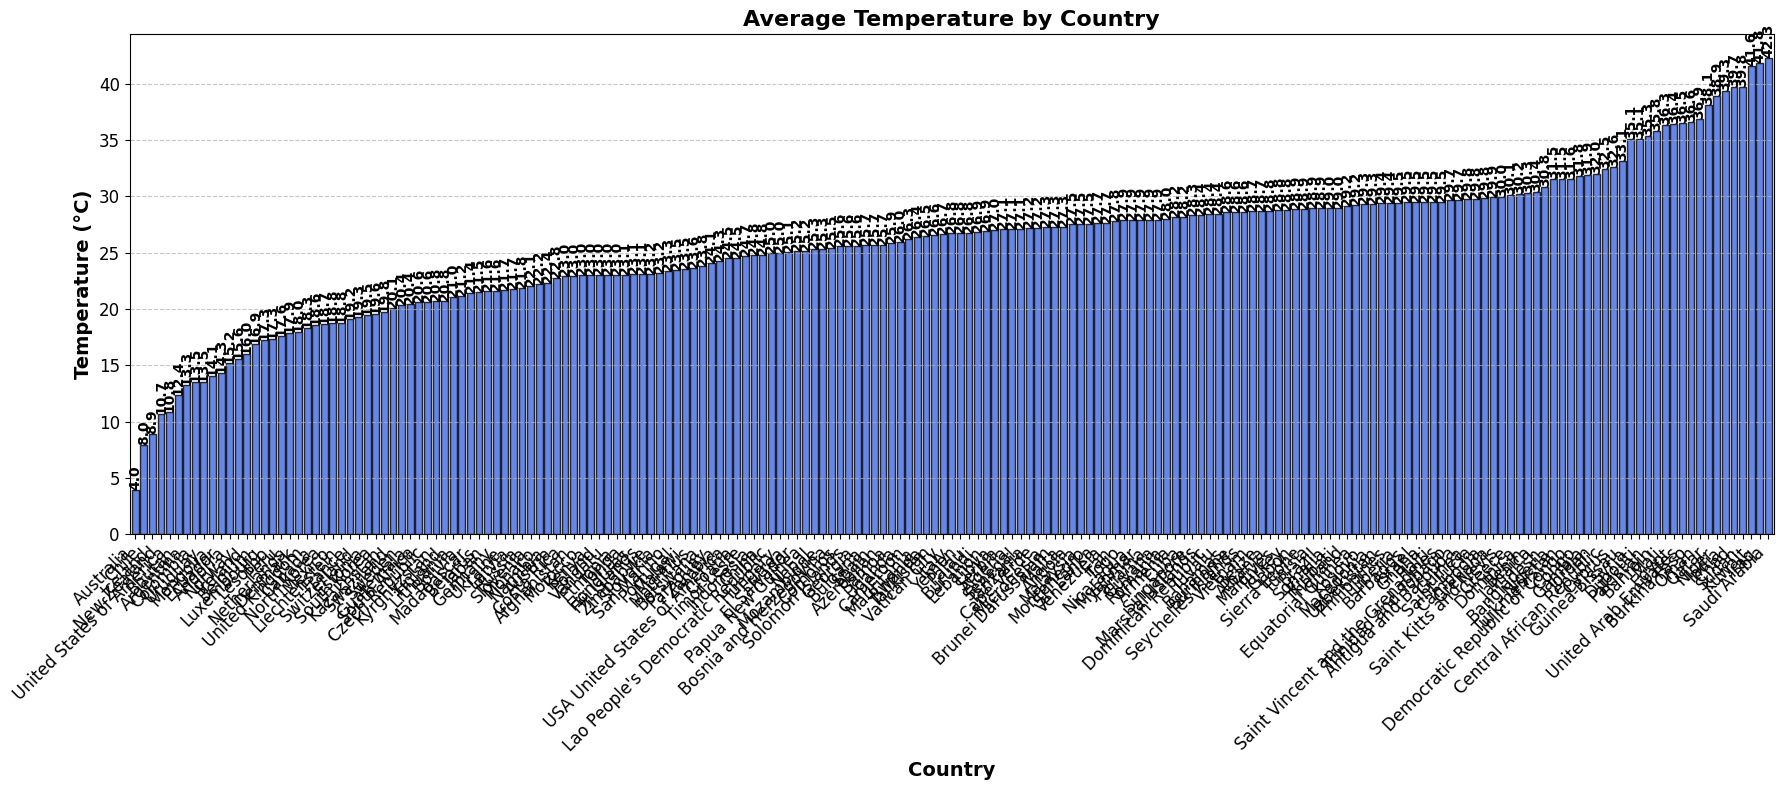

In [ ]:
# ==================== 3. Climate Analysis ====================
climate_trends = df.groupby("country")["temperature_celsius"].mean().sort_values()
plt.figure(figsize=(18, 8))
ax = climate_trends.plot(kind="bar", color='royalblue', width=0.8, edgecolor='black', alpha=0.8)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title("Average Temperature by Country", fontsize=16, fontweight='bold')
plt.xlabel("Country", fontsize=14, fontweight='bold')
plt.ylabel("Temperature (°C)", fontsize=14, fontweight='bold')
plt.tight_layout()
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2, p.get_height()),
                 ha='center', va='bottom', fontsize=10, color='black', fontweight='bold', rotation=90)
plt.show()

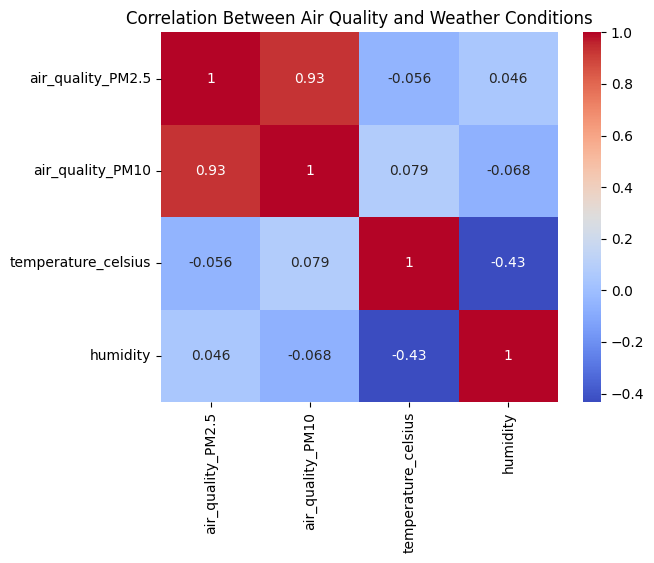

In [ ]:
# ==================== 4. Air Quality Impact ====================
correlations = df[["air_quality_PM2.5", "air_quality_PM10", "temperature_celsius", "humidity"]].corr()
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.title("Correlation Between Air Quality and Weather Conditions")
plt.show()


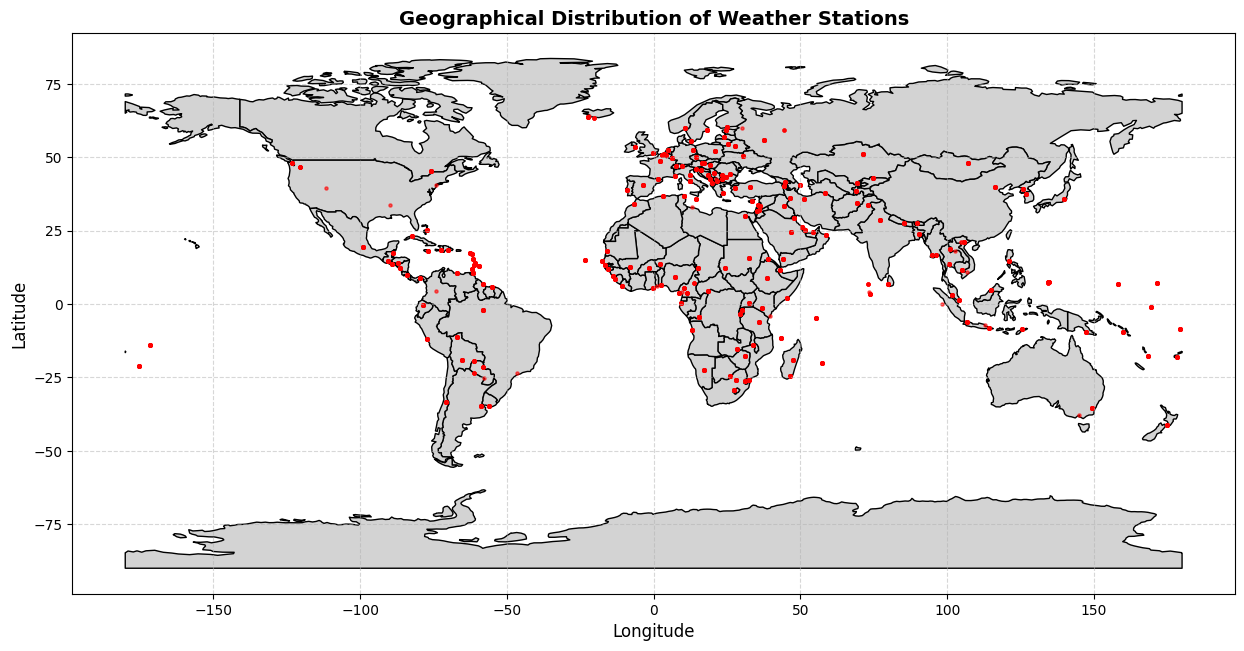

In [ ]:
# ==================== 5. Spatial Analysis ====================
world = gpd.read_file("https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_countries.zip")
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgrey', edgecolor='black')
gdf.plot(ax=ax, markersize=5, color='red', alpha=0.6)
plt.title("Geographical Distribution of Weather Stations", fontsize=14, fontweight='bold')
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

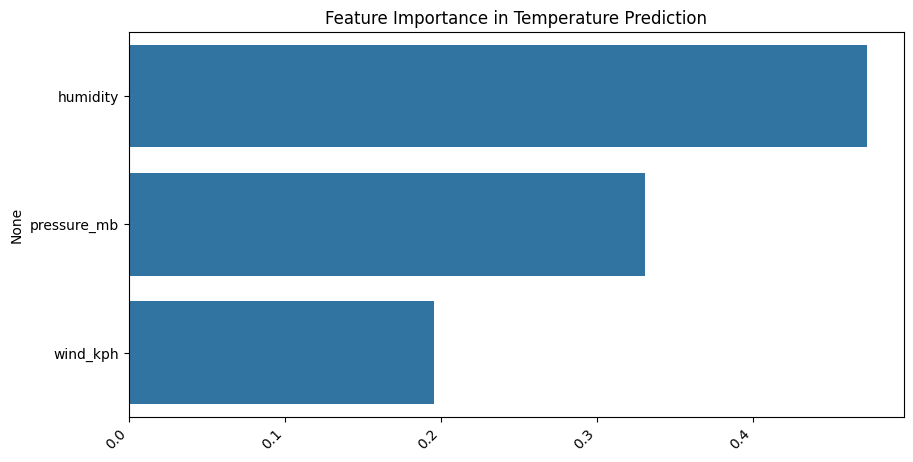

In [ ]:
# ==================== 6. Feature Importance ====================
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=features)
plt.xticks(rotation=45, ha='right')
plt.title("Feature Importance in Temperature Prediction")
plt.show()